# Problematic

Streaming is becoming one of the main source of incomes for the music industry. In 2019, the number of paid subscription raised by 32% worldwide. In order to increase the number of streams, a lot people work to make the artists and their music visible. Spending money and time, labels, distributors and publishers release new songs and expect to seduce the audience and make these song streamed in order to increase their income. Can we predict which features will make a song listened by a lot of people and thus a good investment?

## EDA

This dataset is composed of thousands of tracks from Spotify in 2018. All have a popularity socre between 0 and 100. This score depends of the number of streams and the date of these streams. The oldest they are, the less they will count. 14 other features are also part of the dataset. We will try to determine a model of prediction from these features and predict the song popularity of a track

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("song_data.csv")

In [3]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
df.shape

(18835, 15)

In [5]:
df.describe(include="all")

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
unique,13070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Better,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,NaN,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,NaN,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,NaN,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,NaN,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [7]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

There is no missing value and all variables are quantitative except the title fo the song.

### DATA VISUALIZATION


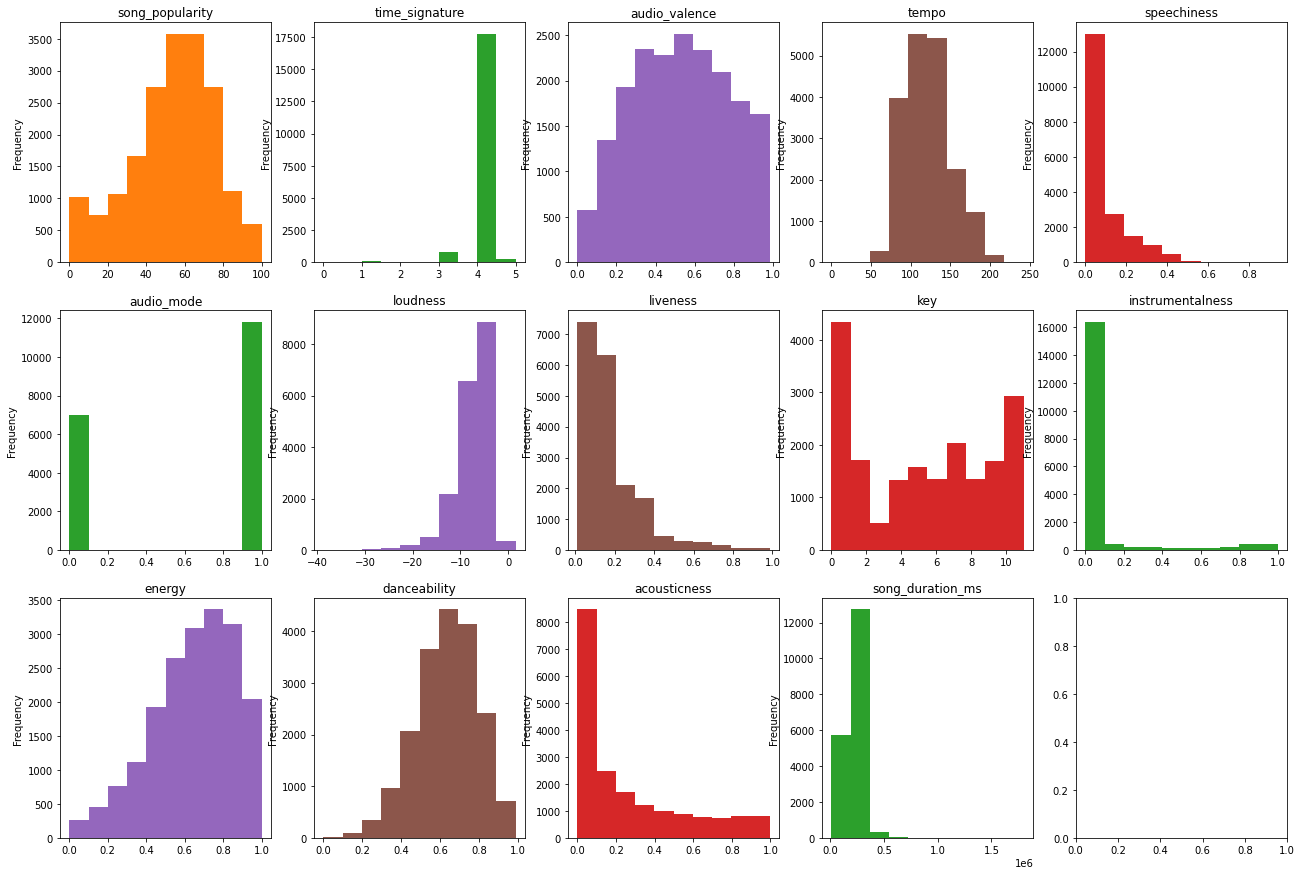

In [8]:
f, axes = plt.subplots(3, 5, figsize=(22, 15))
df["song_popularity"].plot.hist(ax=axes[0,0], color="C1", title="song_popularity")
df["time_signature"].plot.hist(ax=axes[0,1], color="C2",title="time_signature")
df["audio_valence"].plot.hist(ax=axes[0,2], color="C4",title="audio_valence")
df["tempo"].plot.hist(ax=axes[0,3], color="C5",title="tempo")
df["speechiness"].plot.hist(ax=axes[0,4], color="C3",title="speechiness")
df["audio_mode"].plot.hist(ax=axes[1,0], color="C2",title="audio_mode")
df["loudness"].plot.hist(ax=axes[1,1], color="C4", title="loudness")
df["liveness"].plot.hist(ax=axes[1,2], color="C5",title="liveness")
df["key"].plot.hist(ax=axes[1,3], color="C3",title="key")
df["instrumentalness"].plot.hist(ax=axes[1,4], color="C2",title="instrumentalness")
df["energy"].plot.hist(ax=axes[2,0], color="C4",title="energy")
df["danceability"].plot.hist(ax=axes[2,1], color="C5",title="danceability")
df["acousticness"].plot.hist(ax=axes[2,2], color="C3",title="acousticness")
df["song_duration_ms"].plot.hist(ax=axes[2,3], color="C2",title="song_duration_ms")
plt.show()

We see the distribution of each variables. The distribution of energy and danceability are pretty similar. Also, the tracks are meanly vocals (instrumentalness < 0,5 for more than 16 000 tracks).
Finally, most of the tracks have a popularity rate between 50 and 70.


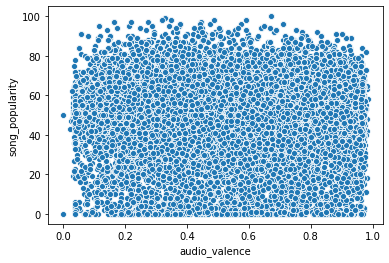

In [9]:
sns.scatterplot(x="audio_valence", y="song_popularity", data=df)

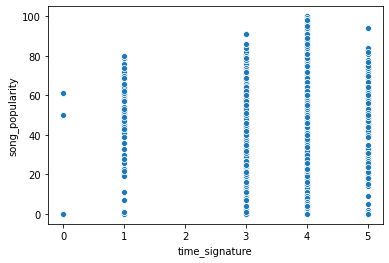

In [10]:
sns.scatterplot(x="time_signature", y="song_popularity", data=df)

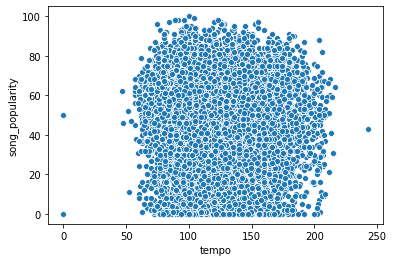

In [11]:
sns.scatterplot(x="tempo", y="song_popularity", data=df)

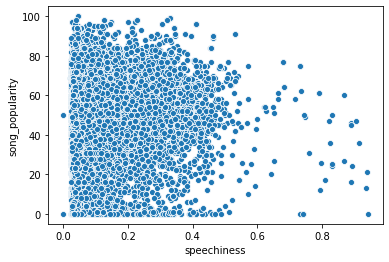

In [12]:
sns.scatterplot(x="speechiness", y="song_popularity", data=df)

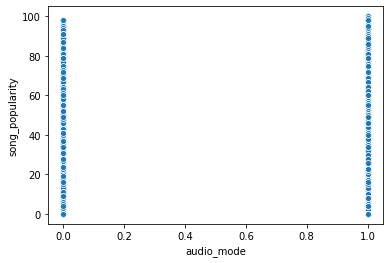

In [13]:
sns.scatterplot(x="audio_mode", y="song_popularity", data=df)

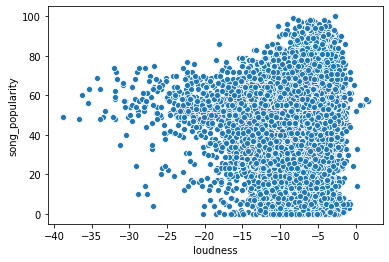

In [14]:
sns.scatterplot(x="loudness", y="song_popularity", data=df)

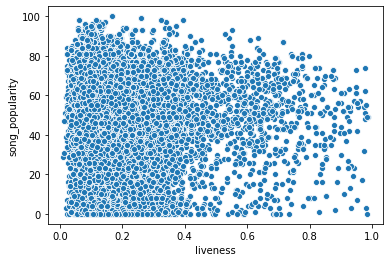

In [15]:
sns.scatterplot(x="liveness", y="song_popularity", data=df)

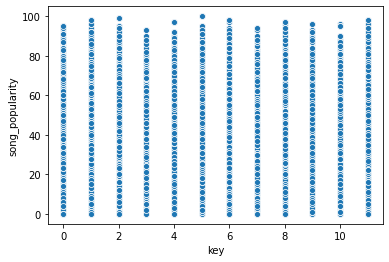

In [16]:
sns.scatterplot(x="key", y="song_popularity", data=df)

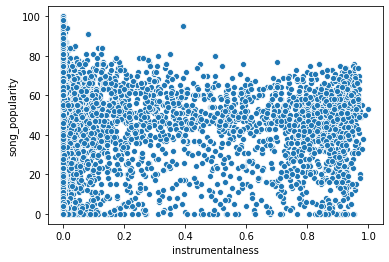

In [17]:
sns.scatterplot(x="instrumentalness", y="song_popularity", data=df)

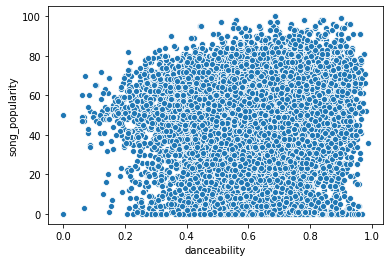

In [18]:
sns.scatterplot(x="danceability", y="song_popularity", data=df)

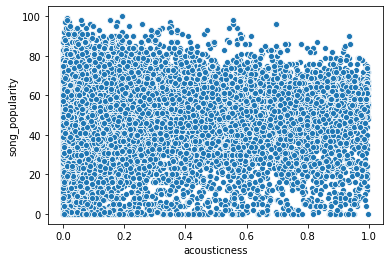

In [19]:
sns.scatterplot(x="acousticness", y="song_popularity", data=df)

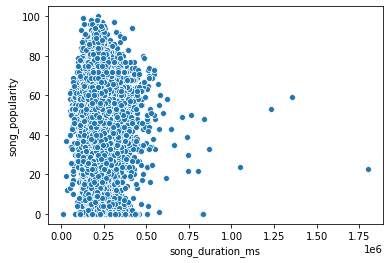

In [20]:
sns.scatterplot(x="song_duration_ms", y="song_popularity", data=df)

The features don't seem to have a linear relationship with the target feature: 'song popularity'

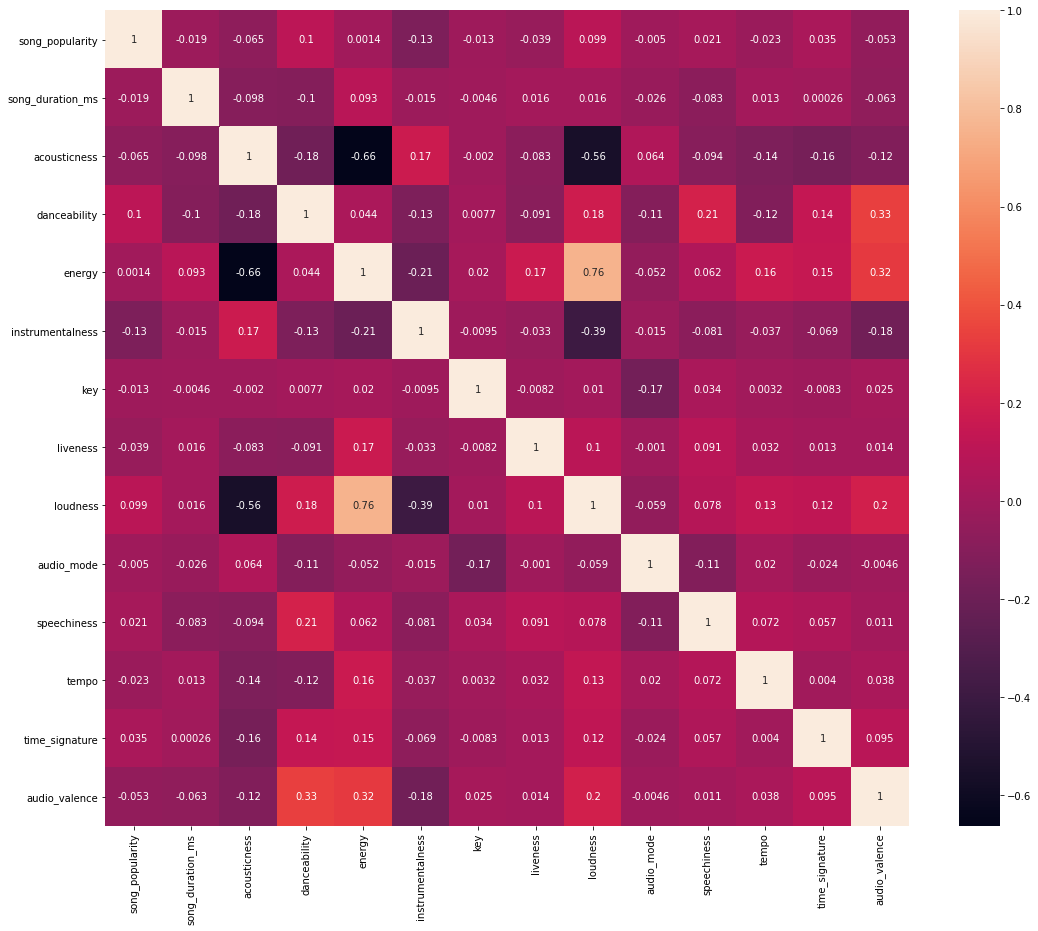

In [21]:
heat = plt.subplots(figsize=(18,15))
sns.heatmap(df.corr(), annot=True)

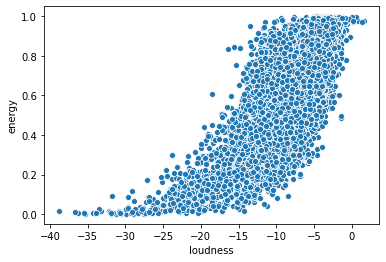

In [22]:
sns.scatterplot(x="loudness", y="energy", data=df)

We can see menial correlations beatween the target and the other features. A little more for loudness and danceability.
Loudness and energy have a kind of linear relationship.


## Data Preprocessing

Let's study the features and put in place a machine learning model to predict the score of the song popularity.

In [23]:
df1 = df.drop(["song_name"], axis=1)

In [24]:
df1

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323



After withdrawing the variable 'song_name' unacessary to study our model, let's fix the X and y.

In [25]:
X = df1.drop(["song_popularity"], axis=1)
y = df1["song_popularity"]




### Normalisation

Data scalling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
std = StandardScaler()
X = std.fit_transform(X)
X

array([[ 0.73675732, -0.87637397, -0.8763996 , ...,  1.60156497,
         0.13694446, -0.22061046],
       [-0.02135038, -0.85981763, -0.58287978, ..., -0.55085753,
         0.13694446, -0.64575064],
       [ 0.22578605, -0.86719525,  0.66138905, ...,  0.09778769,
         0.13694446, -0.83379341],
       ...,
       [-0.60115248,  2.03823368,  0.54653347, ...,  0.32948899,
         0.13694446, -0.9891331 ],
       [ 2.23872896,  2.37767318, -0.92744653, ..., -0.52275247,
         0.13694446, -0.8378813 ],
       [-0.41209311,  2.25990845,  0.04244507, ..., -1.03028036,
         0.13694446,  0.21679339]])

### Train_test_split

We separate the datas that will be trained from the ones which will be tested.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=35)

## Machine Learning

Let's applicate the various models to test which one perform the best.

### Linear Regression model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
regressor.coef_

array([-0.2343067 , -1.11719415,  2.08582343, -2.70893037, -2.20955745,
       -0.23408788, -0.73939035,  3.04253035,  0.09690758, -0.27604264,
       -0.21044933,  0.4260632 , -2.15767365])

Score evaluation

In [33]:
score_train = regressor.score(X_train,y_train)
score_test = regressor.score(X_test,y_test)
print ("Train_Score: ", score_train)
print("Test_Score: ", score_test)

Train_Score:  0.04921489136815571
Test_Score:  0.03234412019884669


In [34]:
feature_importance = pd.DataFrame({"features": ['song_duration_ms', 
                                                'acousticness', 
                                                'danceability', 
                                                'energy', 
                                                'instrumentalness',
                                                'key',
                                                'liveness',
                                                'loudness',
                                                'audio_mode',
                                                'speechiness',
                                                'tempo',
                                                'time_signature',
                                                'audio_valence',
                                        
                                                ], 
                                "values":regressor.coef_})

feature_importance.sort_values(["values"])

,features,values
3,energy,-2.708930
4,instrumentalness,-2.209557
12,audio_valence,-2.157674
1,acousticness,-1.117194
6,liveness,-0.739390
9,speechiness,-0.276043
0,song_duration_ms,-0.234307
5,key,-0.234088
10,tempo,-0.210449
8,audio_mode,0.096908


In [35]:
ypReg = regressor.predict(X_test)
ypReg

array([58.71628731, 51.57150845, 47.343065  , ..., 53.90545124,
       53.64483686, 47.67303557])

MSE

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
y_true = y_test
y_pred = ypReg
mean_squared_error(y_true,y_pred)

459.24953637511936

The model doesn't perform well and it overfits.

### Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [39]:
treeregressor = DecisionTreeRegressor()
treeregressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
score_train = treeregressor.score(X_train,y_train)
score_test = treeregressor.score(X_test,y_test)
print ("Train_Score: ", score_train)
print("Test_Score: ", score_test)

Train_Score:  0.988960994519151
Test_Score:  -0.2383630261002616


In [41]:
ypReg2 = treeregressor.predict(X_test)

MSE

In [42]:
y_true = y_test
y_pred = ypReg2
mean_squared_error(y_true,y_pred)

587.7271636250508

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor


In [44]:
randomregressor = RandomForestRegressor()
randomregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
score_train = randomregressor.score(X_train,y_train)
score_test = randomregressor.score(X_test,y_test)
print ("Train_Score: ", score_train)
print("Test_Score: ", score_test)

Train_Score:  0.9081485929856161
Test_Score:  0.38116778441524857


In [46]:
ypReg3 = randomregressor.predict(X_test)

MSE

In [47]:
y_true = y_test
y_pred = ypReg3
mean_squared_error(y_true,y_pred)

293.69780521530635

In [48]:
randomregressor.feature_importances_

array([0.09336585, 0.09592817, 0.0976876 , 0.09443063, 0.09272108,
       0.04290078, 0.08798922, 0.10701351, 0.0096521 , 0.08812958,
       0.08807877, 0.00553617, 0.09656653])

In [49]:
feature_importance = pd.DataFrame({"features": ['song_duration_ms', 
                                                'acousticness', 
                                                'danceability', 
                                                'energy', 
                                                'instrumentalness',
                                                'key',
                                                'liveness',
                                                'loudness',
                                                'audio_mode',
                                                'speechiness',
                                                'tempo',
                                                'time_signature',
                                                'audio_valence',
                                        
                                                ], 
                                "values":randomregressor.feature_importances_})
feature_importance.sort_values(["values"])

,features,values
11,time_signature,0.005536
8,audio_mode,0.009652
5,key,0.042901
6,liveness,0.087989
10,tempo,0.088079
9,speechiness,0.088130
4,instrumentalness,0.092721
0,song_duration_ms,0.093366
3,energy,0.094431
1,acousticness,0.095928


The Random Forest model seems to perform the best. Let's work on the hyper parameters in a second study in order to try to improve this model.